In [ ]:
!pip install tensorflow numpy matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.8728 - loss: 0.3960 - val_accuracy: 0.9866 - val_loss: 0.0447
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9770 - loss: 0.0758 - val_accuracy: 0.9897 - val_loss: 0.0313
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9836 - loss: 0.0566 - val_accuracy: 0.9913 - val_loss: 0.0265
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9879 - loss: 0.0409 - val_accuracy: 0.9913 - val_loss: 0.0258
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9894 - loss: 0.0353 - val_accuracy: 0.9914 - val_loss: 0.0274
Epoch 6/10


KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Character: 1


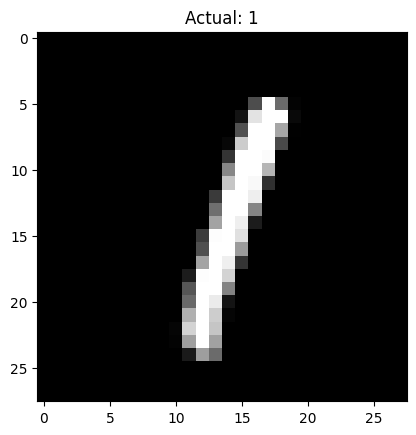

In [ ]:
# Predict a single image
import numpy as np
index = 5  # Select an image index
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Actual: " + str(y_test[index]))
prediction = np.argmax(model.predict(x_test[index].reshape(1, 28, 28, 1)))
print("Predicted Character:", prediction)